<a href="https://colab.research.google.com/github/haotianxu2021/Marshall_data_competition_2021/blob/main/da_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import minmax_scale
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv("M.csv")
df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,9,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Consignee,Original Port Of Loading Country,Original Port Of Loading City,Final Port Of Discharge Country,Final Port Of Discharge City,Equipment Number,Purchase Order Number,Measurement,ETA,Earliest Receipt Date,Expected Receipt Date,Latest Receipt Date,Earliest Delivery Date,Expected Delivery Date,Latest Delivery Date,Equipment Size,Equipment Type,Origin Type,ETD,ETA.1,Estimated Time of Journey
0,"1616 HOLDINGS\,INC.",BANGLADESH,CHITTAGONG,UNITED STATES,NEWARK,MRKU0381235,4302776002,1.714,12/15/2021,10/24/2021,NaN,10/24/2021,1/7/2022,1/7/2022,1/7/2022,40.0,DRY,CFS,11/11/2021,12/15/2021,34.0
1,"1616 HOLDINGS\,INC.",BANGLADESH,CHITTAGONG,UNITED STATES,NEWARK,MRKU0381235,4302776002,1.714,12/15/2021,10/24/2021,NaN,10/24/2021,1/7/2022,1/7/2022,1/7/2022,40.0,DRY,CFS,11/11/2021,12/15/2021,34.0
2,"1616 HOLDINGS\,INC.",BANGLADESH,CHITTAGONG,UNITED STATES,NEWARK,MRKU0381235,4302776002,1.714,12/15/2021,10/24/2021,NaN,10/24/2021,1/7/2022,1/7/2022,1/7/2022,40.0,DRY,CFS,11/11/2021,12/15/2021,34.0
3,"1616 HOLDINGS\,INC.",BANGLADESH,CHITTAGONG,UNITED STATES,NEWARK,MRKU0381235,4302776002,1.714,12/15/2021,10/24/2021,NaN,10/24/2021,1/7/2022,1/7/2022,1/7/2022,40.0,DRY,CFS,11/11/2021,12/15/2021,34.0
4,"1616 HOLDINGS\,INC.",BANGLADESH,CHITTAGONG,UNITED STATES,NEWARK,MRKU0381235,4302776003,7.834,12/15/2021,10/24/2021,NaN,10/24/2021,1/7/2022,1/7/2022,1/7/2022,40.0,DRY,CFS,11/11/2021,12/15/2021,34.0


In [ ]:
df.shape
df.isnull().sum()

Consignee                                0
Original Port Of Loading Country         0
Original Port Of Loading City            0
Final Port Of Discharge Country          0
Final Port Of Discharge City             0
Equipment Number                         2
Purchase Order Number                 3244
Measurement                              0
ETA                                      0
Earliest Receipt Date               173522
Expected Receipt Date                33888
Latest Receipt Date                 185059
Earliest Delivery Date              449058
Expected Delivery Date              192003
Latest Delivery Date                472709
Equipment Size                         287
Equipment Type                           0
Origin Type                             19
ETD                                      1
ETA.1                                    1
Estimated Time of Journey                1
dtype: int64

In [ ]:
df.drop(columns=["Earliest Receipt Date","Latest Receipt Date","Earliest Delivery Date","Latest Delivery Date","ETA.1","Equipment Number"],inplace=True)
df.dropna(inplace=True)

In [ ]:
df['Expected Receipt Date'] = pd.to_datetime(df['Expected Receipt Date'],format="%m/%d/%Y")
#df['Latest Receipt Date'] = pd.to_datetime(df['Latest Receipt Date'],format="%m/%d/%Y")
#df['Earliest Delivery Date'] = pd.to_datetime(df['Earliest Delivery Date'],format="%m/%d/%Y")
df['Expected Delivery Date'] = pd.to_datetime(df['Expected Delivery Date'],format="%m/%d/%Y")
#df['Latest Delivery Date'] = pd.to_datetime(df['Latest Delivery Date'],format="%m/%d/%Y")
#df['ETD'] = pd.to_datetime(df['ETD'],format="%m/%d/%Y")
#df['ETA'] = pd.to_datetime(df['ETA'],format="%m/%d/%Y")

In [ ]:
df.dtypes

Consignee                                   object
Original Port Of Loading Country            object
Original Port Of Loading City               object
Final Port Of Discharge Country             object
Final Port Of Discharge City                object
Purchase Order Number                       object
Measurement                                float64
ETA                                         object
Expected Receipt Date               datetime64[ns]
Expected Delivery Date              datetime64[ns]
Equipment Size                             float64
Equipment Type                              object
Origin Type                                 object
ETD                                         object
Estimated Time of Journey                  float64
dtype: object

In [ ]:
df.isnull().sum()

Consignee                           0
Original Port Of Loading Country    0
Original Port Of Loading City       0
Final Port Of Discharge Country     0
Final Port Of Discharge City        0
Purchase Order Number               0
Measurement                         0
ETA                                 0
Expected Receipt Date               0
Expected Delivery Date              0
Equipment Size                      0
Equipment Type                      0
Origin Type                         0
ETD                                 0
Estimated Time of Journey           0
dtype: int64

In [ ]:
df["Time Difference"]=df["Expected Delivery Date"] - df["Expected Receipt Date"]

In [ ]:
df["Time Difference"]=df["Time Difference"] /np.timedelta64(1, 'D')

In [ ]:
df.head()

,Consignee,Original Port Of Loading Country,Original Port Of Loading City,Final Port Of Discharge Country,Final Port Of Discharge City,Purchase Order Number,Measurement,ETA,Expected Receipt Date,Expected Delivery Date,Equipment Size,Equipment Type,Origin Type,ETD,Estimated Time of Journey,Time Difference
4848,AB WORLD FOODS LTD,INDIA,COCHIN,UNITED KINGDOM,FELIXSTOWE,506520,5.30,10/10/2030,2016-03-28,2016-05-09,20.0,DRY,CY,4/12/2016,5294.0,42.0
4849,AB WORLD FOODS LTD,INDIA,COCHIN,UNITED KINGDOM,FELIXSTOWE,506523,20.00,10/10/2030,2016-03-14,2016-04-25,20.0,DRY,CY,4/12/2016,5294.0,42.0
4850,AB WORLD FOODS LTD,INDIA,COCHIN,UNITED KINGDOM,FELIXSTOWE,515845,20.00,10/10/2030,2017-11-28,2018-01-09,20.0,DRY,CY,12/4/2017,4693.0,42.0
4851,AB WORLD FOODS LTD,INDIA,JAWAHARLAL NEHRU,UNITED KINGDOM,FELIXSTOWE,511378,4.32,10/10/2030,2016-08-16,2016-09-26,20.0,DRY,CY,9/9/2016,5144.0,41.0
4852,AB WORLD FOODS LTD,INDIA,JAWAHARLAL NEHRU,UNITED KINGDOM,FELIXSTOWE,511378,23.68,10/10/2030,2016-08-16,2016-09-26,20.0,DRY,CY,9/9/2016,5144.0,41.0


In [ ]:
df.to_csv("mm.csv",index=False)

KeyboardInterrupt: ignored

In [ ]:
le = LabelEncoder()
X_le = df.select_dtypes(include=[object])
X_le.drop(columns=["ETA","Purchase Order Number","ETD"],inplace=True)
X_le

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Consignee,Original Port Of Loading Country,Original Port Of Loading City,Final Port Of Discharge Country,Final Port Of Discharge City,Equipment Type,Origin Type
4848,AB WORLD FOODS LTD,INDIA,COCHIN,UNITED KINGDOM,FELIXSTOWE,DRY,CY
4849,AB WORLD FOODS LTD,INDIA,COCHIN,UNITED KINGDOM,FELIXSTOWE,DRY,CY
4850,AB WORLD FOODS LTD,INDIA,COCHIN,UNITED KINGDOM,FELIXSTOWE,DRY,CY
4851,AB WORLD FOODS LTD,INDIA,JAWAHARLAL NEHRU,UNITED KINGDOM,FELIXSTOWE,DRY,CY
4852,AB WORLD FOODS LTD,INDIA,JAWAHARLAL NEHRU,UNITED KINGDOM,FELIXSTOWE,DRY,CY
...,...,...,...,...,...,...,...
774300,H&M HENNES & MAURITZ GBC AB,BANGLADESH,CHITTAGONG,TAIWAN CHINA,KEELUNG,HIGH,CFS
774301,H&M HENNES & MAURITZ GBC AB,BANGLADESH,CHITTAGONG,TAIWAN CHINA,KEELUNG,HIGH,CFS
774302,H&M HENNES & MAURITZ GBC AB,BANGLADESH,CHITTAGONG,TAIWAN CHINA,KEELUNG,HIGH,CFS
774303,H&M HENNES & MAURITZ GBC AB,BANGLADESH,CHITTAGONG,TAIWAN CHINA,KEELUNG,HIGH,CFS


In [ ]:
X_le = X_le.apply(le.fit_transform)

In [ ]:
X_le.tail()

,Consignee,Original Port Of Loading Country,Original Port Of Loading City,Final Port Of Discharge Country,Final Port Of Discharge City,Equipment Type,Origin Type
774300,216,3,27,57,73,4,0
774301,216,3,27,57,73,4,0
774302,216,3,27,57,73,4,0
774303,216,3,27,57,73,4,0
774304,216,3,27,57,73,4,0


In [ ]:
df[X_le.columns] = X_le
df.head()

,Consignee,Original Port Of Loading Country,Original Port Of Loading City,Final Port Of Discharge Country,Final Port Of Discharge City,Purchase Order Number,Measurement,ETA,Expected Receipt Date,Expected Delivery Date,Equipment Size,Equipment Type,Origin Type,ETD,Estimated Time of Journey,Time Difference
4848,0,18,28,62,44,506520,5.30,10/10/2030,2016-03-28,2016-05-09,20.0,1,1,4/12/2016,5294.0,42.0
4849,0,18,28,62,44,506523,20.00,10/10/2030,2016-03-14,2016-04-25,20.0,1,1,4/12/2016,5294.0,42.0
4850,0,18,28,62,44,515845,20.00,10/10/2030,2017-11-28,2018-01-09,20.0,1,1,12/4/2017,4693.0,42.0
4851,0,18,62,62,44,511378,4.32,10/10/2030,2016-08-16,2016-09-26,20.0,1,1,9/9/2016,5144.0,41.0
4852,0,18,62,62,44,511378,23.68,10/10/2030,2016-08-16,2016-09-26,20.0,1,1,9/9/2016,5144.0,41.0


In [ ]:
data = df.drop(columns=["ETA","ETD","Estimated Time of Journey","Purchase Order Number"])
data.head()

,Consignee,Original Port Of Loading Country,Original Port Of Loading City,Final Port Of Discharge Country,Final Port Of Discharge City,Measurement,Expected Receipt Date,Expected Delivery Date,Equipment Size,Equipment Type,Origin Type,Time Difference
4848,0,18,28,62,44,5.30,2016-03-28,2016-05-09,20.0,1,1,42.0
4849,0,18,28,62,44,20.00,2016-03-14,2016-04-25,20.0,1,1,42.0
4850,0,18,28,62,44,20.00,2017-11-28,2018-01-09,20.0,1,1,42.0
4851,0,18,62,62,44,4.32,2016-08-16,2016-09-26,20.0,1,1,41.0
4852,0,18,62,62,44,23.68,2016-08-16,2016-09-26,20.0,1,1,41.0


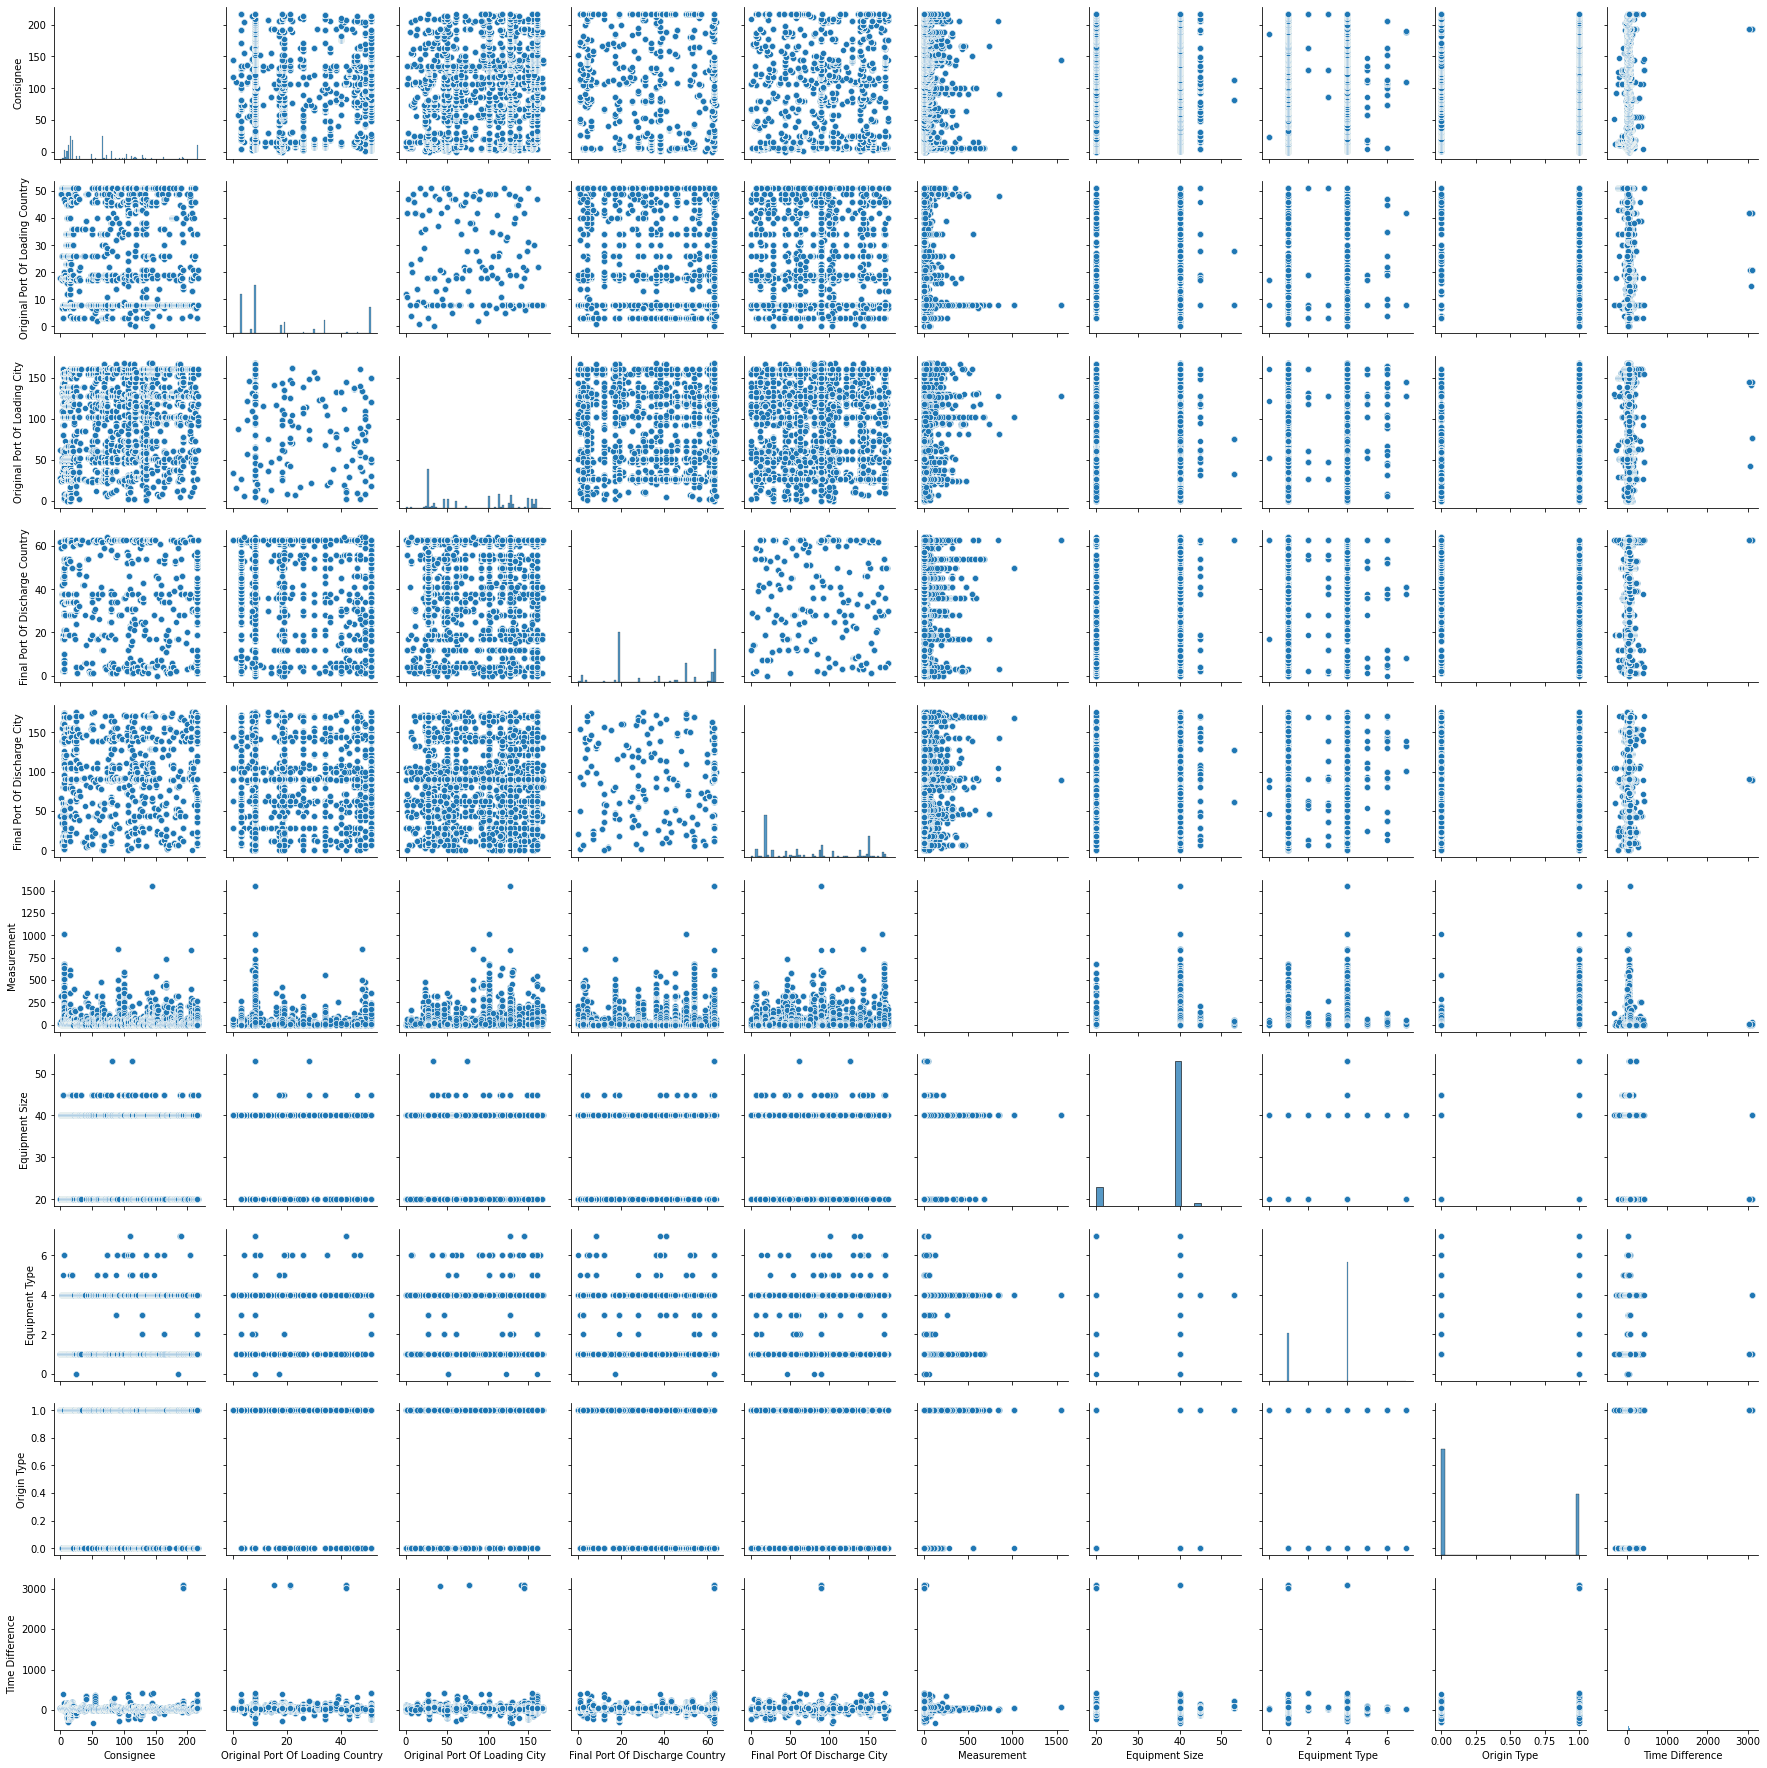

In [ ]:
sns.pairplot(data=data)

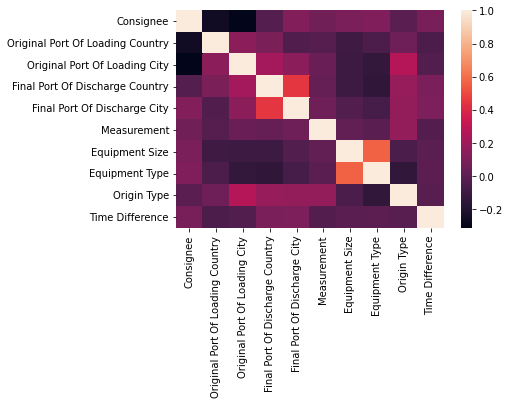

In [ ]:
sns.heatmap(data.corr());

In [ ]:
data.describe()

,Consignee,Original Port Of Loading Country,Original Port Of Loading City,Final Port Of Discharge Country,Final Port Of Discharge City,Measurement,Equipment Size,Equipment Type,Origin Type,Time Difference
count,571241.000000,571241.000000,571241.000000,571241.000000,571241.000000,571241.000000,571241.000000,571241.000000,571241.000000,571241.000000
mean,65.611882,19.155404,86.584253,37.602978,75.209125,4.691984,37.820144,3.139361,0.365448,48.012060
std,64.460898,17.568867,50.483824,20.769117,54.883459,24.859589,6.446398,1.360355,0.481556,35.920667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,-316.000000
25%,15.000000,7.000000,27.000000,19.000000,18.000000,0.098000,40.000000,1.000000,0.000000,37.000000
50%,49.000000,8.000000,102.000000,38.000000,63.000000,0.306000,40.000000,4.000000,0.000000,47.000000
75%,92.000000,34.000000,128.000000,62.000000,139.000000,1.230000,40.000000,4.000000,1.000000,61.000000
max,217.000000,51.000000,168.000000,64.000000,176.000000,1547.656000,53.000000,7.000000,1.000000,3096.000000


In [ ]:
X = data.drop(columns=["Time Difference","Expected Receipt Date","Expected Delivery Date"])
y = data["Time Difference"]
print(X.shape,y.shape)
X.head()

(571241, 9) (571241,)


,Consignee,Original Port Of Loading Country,Original Port Of Loading City,Final Port Of Discharge Country,Final Port Of Discharge City,Measurement,Equipment Size,Equipment Type,Origin Type
4848,0,18,28,62,44,5.30,20.0,1,1
4849,0,18,28,62,44,20.00,20.0,1,1
4850,0,18,28,62,44,20.00,20.0,1,1
4851,0,18,62,62,44,4.32,20.0,1,1
4852,0,18,62,62,44,23.68,20.0,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [ ]:
boost_round = 200 # 迭代次数              
early_stop_rounds = 10 # 验证数据若在early_stop_rounds轮中未提高，则提前停止

params = {
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression',  # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 511,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

In [ ]:
results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round= boost_round,
                valid_sets=(lgb_eval, lgb_train),
                valid_names=('validate','train'),
                early_stopping_rounds = early_stop_rounds,
                evals_result= results)

[1]	train's l2: 1121.47	train's auc: 0.864561	validate's l2: 1694.28	validate's auc: 0.860323
Training until validation scores don't improve for 10 rounds.
[2]	train's l2: 1074.05	train's auc: 0.862907	validate's l2: 1644.17	validate's auc: 0.858268
[3]	train's l2: 1029.85	train's auc: 0.863851	validate's l2: 1597.43	validate's auc: 0.858911
[4]	train's l2: 989.918	train's auc: 0.864967	validate's l2: 1555.08	validate's auc: 0.860248
[5]	train's l2: 954.522	train's auc: 0.866944	validate's l2: 1517.36	validate's auc: 0.861919
[6]	train's l2: 921.559	train's auc: 0.866996	validate's l2: 1482.1	validate's auc: 0.862138
[7]	train's l2: 891.484	train's auc: 0.869062	validate's l2: 1449.49	validate's auc: 0.86421
[8]	train's l2: 863.816	train's auc: 0.869565	validate's l2: 1419.12	validate's auc: 0.864555
[9]	train's l2: 838.855	train's auc: 0.869662	validate's l2: 1391.75	validate's auc: 0.864628
[10]	train's l2: 816.654	train's auc: 0.871186	validate's l2: 1367.77	validate's auc: 0.866343

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred

array([41.69851839, 52.63804728,  2.98392142, ..., 41.6879015 ,
       44.97526331, 59.175392  ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: more than one metric available, picking one to plot.
  """Entry point for launching an IPython kernel.


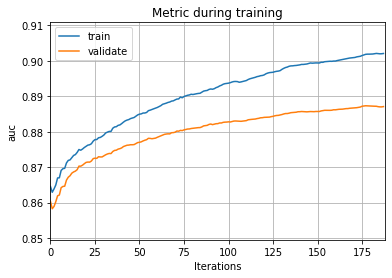

In [ ]:
lgb.plot_metric(results)
plt.show()

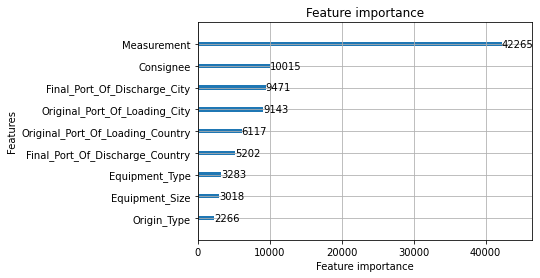

In [ ]:
lgb.plot_importance(gbm,importance_type = "split")
plt.show()

In [ ]:
ax = lgb.create_tree_digraph(gbm)
with open('fst.svg', 'w') as f:
    f.write(ax._repr_svg_())